# This code is to test XGBoosting with null values

Now attempting to play around with null values in data included. 

As xgboost predicts for the missing values, there was a much greater error seen in the results. The data is being drawn off by the predictions made as there is very little data in certain catagories. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets


In [2]:
import xgboost as xgb
from xgboost import XGBRegressor

In [5]:
nutrition = pd.read_csv("/Users/oscarbond/Documents/GitHub/green-team-repo-2/Random forests/OB - Price/XGBoosting/1.210221_Nutrition_Data_including Nulls.csv")

nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/kg),Land use (m2/100g),GHG(kgco2eq/kg),GHG(kgco2eq/100g),...,Glutamic acid (mg),Glycine (mg),Proline (mg),Serine (mg),Hydroxyproline (mg),Alcohol (g),Caffeine (mg),Theobromine (mg),Serving Weight 1 (g),200 Calorie Weight (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,1.70,260.0,0.653846,Bread products,3.482,0.3482,1.441,0.1441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,60.606
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,3.482,0.3482,1.441,0.1441,...,1614.0,214.0,559.0,347.0,NaN,0.0,0.0,0.0,39.0,73.260
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,3.482,0.3482,1.441,0.1441,...,1793.0,237.0,621.0,385.0,NaN,0.0,0.0,0.0,28.0,64.725
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,1.50,567.0,0.264550,Bread products,3.482,0.3482,1.441,0.1441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,69.204
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,1.50,567.0,0.264550,Bread products,3.482,0.3482,1.441,0.1441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,67.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.310,0.0310,0.455,0.0455,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,27.0,82.988
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.310,0.0310,0.455,0.0455,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,1052.632
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,80.642,8.0642,21.240,2.1240,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,200.0,208.333
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.310,0.0310,0.455,0.0455,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,175.0,96.154


In [18]:
# pulling out the features data
X = nutrition.iloc[:, 16:]
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)",...,Glutamic acid (mg),Glycine (mg),Proline (mg),Serine (mg),Hydroxyproline (mg),Alcohol (g),Caffeine (mg),Theobromine (mg),Serving Weight 1 (g),200 Calorie Weight (g)
0,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250,28,1.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,60.606
1,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898,279,6.04,...,1614.0,214.0,559.0,347.0,NaN,0.0,0.0,0.0,39.0,73.260
2,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275,299,6.59,...,1793.0,237.0,621.0,385.0,NaN,0.0,0.0,0.0,28.0,64.725
3,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057,125,6.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,69.204
4,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580,197,5.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,67.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507,4,0.78,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,27.0,82.988
1219,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053,62,0.90,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,1052.632
1220,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486,70,1.15,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,200.0,208.333
1221,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452,30,0.49,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,175.0,96.154


In [8]:
# pulling out the price data
y = nutrition.iloc[:, 4:5].astype('float64').dropna()
y

,Price per Weight (£/100Gram)
0,0.653846
1,0.264550
2,0.264550
3,0.264550
4,0.264550
...,...
1218,1.058824
1219,0.250000
1220,0.750000
1221,0.041000


In [9]:
# flattening the array for use in the random forest algorithm
y = np.ravel(y)
y

array([0.65384615, 0.26455027, 0.26455027, ..., 0.75      , 0.041     ,
       0.17142857])

In [10]:
from sklearn.model_selection import train_test_split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X,y,test_size=0.2)
# splitting the data into train and test data. 
#size =0.2 means 80% data is training data, 20% testing

In [11]:
# splitting the training data into validation and training data. 
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation,test_size=0.05)

## Implementing XGBoost model 

In [12]:
# First step is to transform the data into a format that it can
# be used in XGBoost
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [13]:
# Define the parameters of our gradient boosting ensemble 
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
y_pred = model.predict(X_test)

In [15]:
#evaluating the model by checking errors
#generally error decreases slightly as number of trees is increased, converges around 200 trees

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3614471645403288
Mean Squared Error: 208.4740524577692
Root Mean Squared Error: 14.438630560332555


In [16]:
print(np.std(y))

6.578972887019952


In [29]:
Mean_Absolute_Error = []
Mean_Squared_Error = []
Root_Mean_Squared_Error = []

In [30]:
# creating a for loop to evaluate the hyperperameters of the model. Initally with n_estimators
#implementing the random forest here
for i in range (1, 100, 5):
    model = XGBRegressor(objective='reg:squarederror', n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    Mean_Absolute_Error.append(mae)
    Mean_Squared_Error.append(mse)
    Root_Mean_Squared_Error.append(rmse)
    

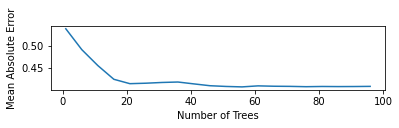

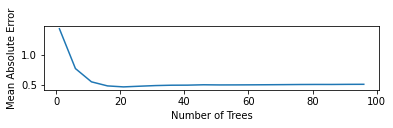

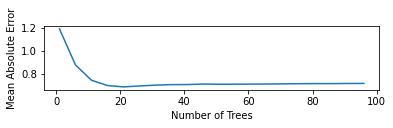

In [31]:
# plotting the different metrics to see the effect of changing the number of trees
import matplotlib.pyplot as plt
n_trees = list(range(1, 100, 5))

f = plt.figure(1)

plt.subplot(311)
plt.plot(n_trees, Mean_Absolute_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(312)
plt.plot(n_trees, Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(313)
plt.plot(n_trees, Root_Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()